<a href="https://colab.research.google.com/github/Edu-png/Alura_exercicios_Pandas_Transforma--o_e_manipula--o_de_dados/blob/main/Classifica%C3%A7%C3%A3o_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:

- Desenvolver um projeto que envolve dados de estudantes de uma universidade para conseguir entender e classificar aqueles estudantes que vão evadir o curso.

Link dos dados: https://github.com/alura-cursos/classificacao_multiclasse/blob/main/Dados/dados_estudantes.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')

In [ ]:
dados.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [ ]:
# Vendo informações sobre as colunas do nosso data frame:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [ ]:
dados['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

Essa coluna é a nossa que queremos prever, podemos ver que ela é multiclasse, então ela tem 3 tipos diferentes de possíveis outputs.

# Analisando nossos dados

Primeiramente vamos dar uma olhada na variável 'Estado Civil'!

In [ ]:
dados['Estado civil'].value_counts(normalize = True)*100

,proportion
Estado civil,
Solteiro,88.584991
Casado,8.566908
Divorciado,2.056962
União Estável,0.565099
Legalmente Separado,0.135624
Viúvo,0.090416


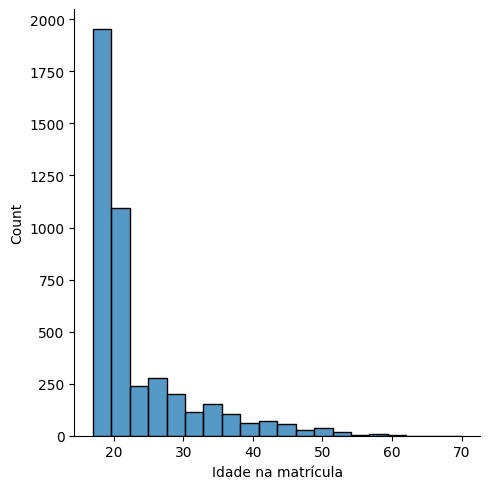

In [ ]:
sns.displot(dados['Idade na matrícula'], bins = 20);

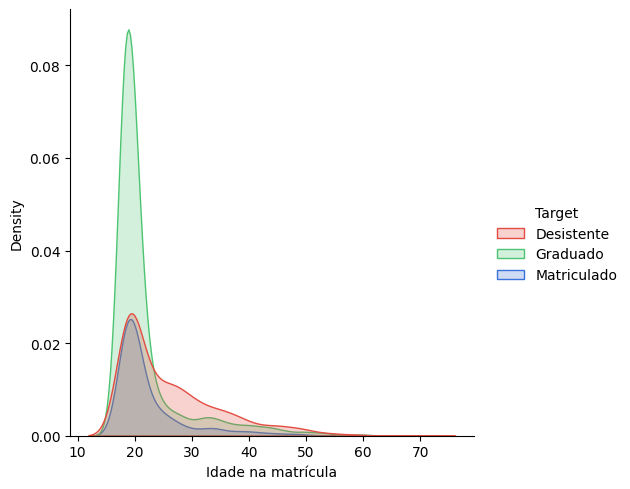

In [ ]:
# Definindo cores para cada uma das classes por meio de um dicionário:

color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))
sns.displot(data = dados, x = 'Idade na matrícula', hue = 'Target', kind = 'kde', fill = True);

Distribuição de densidade da idade na matrícula, destacando que a maioria dos graduados tem em torno de 20 anos, enquanto desistências ocorrem tanto entre jovens quanto em alunos mais velhos.

In [ ]:
dados.Estrangeiro.value_counts(normalize = True)*100

,proportion
Estrangeiro,
Não,97.513562
Sim,2.486438


In [ ]:
dados.Sexo.value_counts(normalize = True)*100

,proportion
Sexo,
Feminino,64.82821
Masculino,35.17179


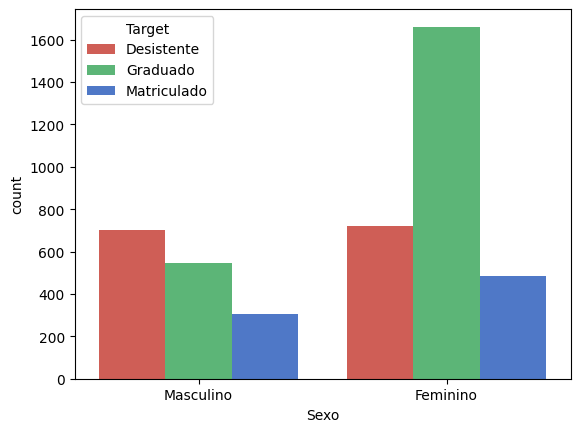

In [ ]:
sns.countplot(x='Sexo', hue = 'Target', data = dados);

Distribuição dos estudantes por sexo e situação acadêmica, mostrando que a maioria dos graduados são do sexo feminino, enquanto a proporção de desistentes é relativamente alta em ambos os sexos.

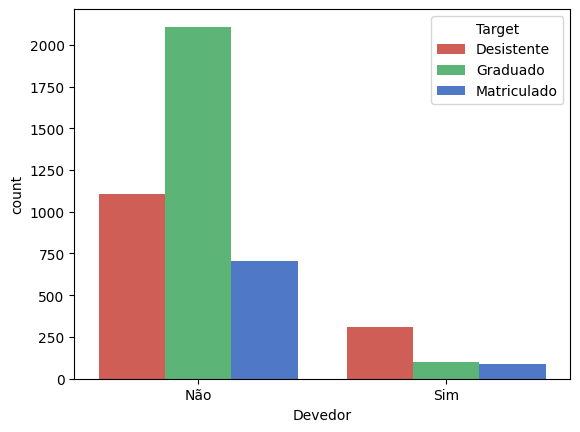

In [ ]:
sns.countplot(x='Devedor', hue = 'Target', data = dados);

Distribuição dos estudantes por status de devedor e situação acadêmica, indicando que a maioria dos graduados não possui dívidas, enquanto a proporção de desistências é significativamente maior entre aqueles que têm dívidas.

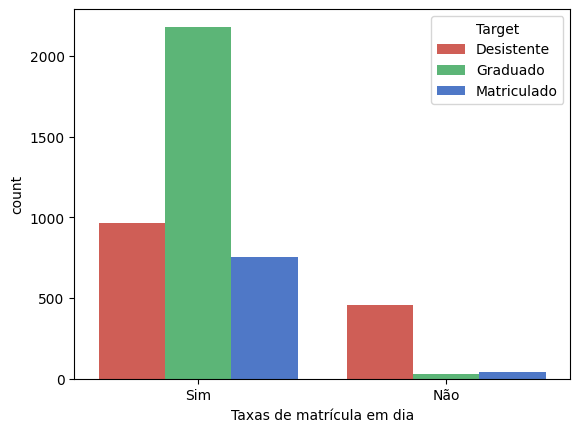

In [ ]:
sns.countplot(x='Taxas de matrícula em dia', hue = 'Target', data = dados);

Distribuição dos estudantes por situação da taxa de matrícula em dia, mostrando que a maioria dos graduados está com a taxa em dia, enquanto a proporção de desistentes é maior entre aqueles com taxas atrasadas.

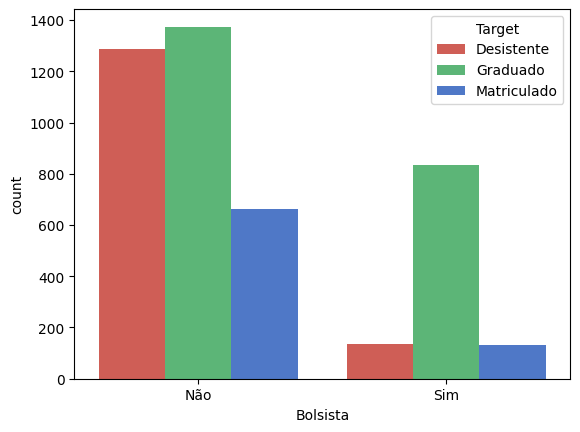

In [ ]:
sns.countplot(x='Bolsista', hue = 'Target', data = dados);

Vemos aqui que quando a pessoa não é bolsita, temos quase a mesma taxa de desistentes e graduados. Quando ela recebe esse auxilio, vemos que a chance de se graduar é muito maior, então podemos observar que o aspecto econômico parece ser um fator que pesa bastante nesse caso.

In [ ]:
# Dados no momento da matrícula

import plotly.express as px

In [ ]:
contagem = dados.groupby(['Curso', 'Target']).size().reset_index(name = 'Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y = 'Curso', x = 'Porcentagem', color = 'Target', orientation = 'h', color_discrete_map = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'});

fig.show()

Em Zootecnia, há uma alta taxa de matrícula, com taxas de desistência e graduação equilibradas. No curso de Turismo, a predominância é de matriculados, com uma taxa de desistência ligeiramente maior que a de graduados. Tecnologias de Produção de Biocombustíveis apresenta uma elevada taxa de desistência, seguida por uma taxa de matrícula significativa e uma menor taxa de graduação. Serviço Social (noturno) e Serviço Social têm alta taxa de matrícula, com taxas de desistência e graduação equilibradas. Odontologia, Jornalismo e Comunicação, Gestão de Publicidade e Marketing, Gestão (noturno), Gestão, Engenharia da Computação, Enfermagem Veterinária, Enfermagem, Educação Básica, Design de Comunicação, Animação e Design Multimídia e Agronomia também mostram alta taxa de matrícula, com taxas de desistência e graduação equilibradas. Este gráfico é útil para entender a retenção e o sucesso dos alunos em diferentes cursos, ajudando instituições educacionais a identificar áreas que podem precisar de melhorias ou suporte adicional.

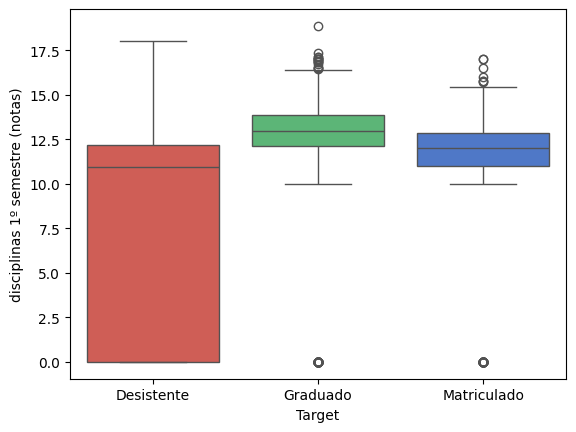

In [ ]:
# Notas mais baixas estão associadas a desistência dos cursos?

sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=dados, hue = 'Target')
plt.show()

O gráfico de caixas mostra a distribuição das notas de disciplinas do 1º semestre para três categorias: Desistente, Graduado e Matriculado. No eixo y, as notas variam de 0 a 17.5. Cada categoria tem uma caixa que representa o intervalo interquartil das notas, com uma linha dentro da caixa indicando a mediana. As linhas que se estendem das caixas representam o alcance dos dados, excluindo os outliers, que são marcados como pontos individuais fora das linhas. Este gráfico é útil para comparar a distribuição, a tendência central e a variabilidade das notas entre as diferentes categorias de status dos alunos.

In [ ]:
# Vamos verrificar se esses dados estão desbalencados:

dados['Target'].value_counts(normalize = True)*100

,proportion
Target,
Graduado,49.932188
Desistente,32.120253
Matriculado,17.947559


Vemos que temos um certo deslanceamento, então vamos tentar tratar isso para que possamos treinar o nosso modelo

# Preparando os nossos dados para a modelagem:

- Primeiro vamos converter todos os dados em valores numéricos usando o OneHotEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Separando as colunas que precisamos tratar:

colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']


In [ ]:
encoder = OneHotEncoder(drop = 'if_binary')

In [ ]:
df_categorico = dados[colunas_categoricas]

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns = encoder.get_feature_names_out(colunas_categoricas))

df_final = pd.concat([dados.drop(colunas_categoricas, axis = 1), df_encoded], axis = 1)

In [ ]:
df_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Vemos que esse data frame tem apenas dados numéricos para lidarmos de agora em diante. Como não vamos trabalhar com um modelo do tipo linear, a escala não é tão importante assim, então não vamos precisar normalizar esses dados.

# Separando as variáveis:

In [ ]:
x = df_final.drop('Target', axis = 1)
y = df_final['Target']

# Separando em treino, teste validação!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x, x_teste, y, y_teste = train_test_split(x,y, test_size = 0.15, stratify = y, random_state = 0)
x_treino, x_val, y_treino, y_val = train_test_split(x,y, test_size = 0.15, stratify = y, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo_rf = RandomForestClassifier(random_state=0)
modelo_rf.fit(x_treino, y_treino)
y_pred = modelo_rf.predict(x_val)
print(f'Acurácia de treino de: {modelo_rf.score(x_treino, y_treino)}')
print(f'Acurácia de validação de: {modelo_rf.score(x_val, y_val)}')

Acurácia de treino de: 0.9978097622027534
Acurácia de validação de: 0.7588652482269503


Vemos que nosso modelo está sofrendo de overfiting, se ajustando muito ao nosso treino e perdendo desempenho na validação. Vamos ajustar isso!

In [ ]:
# Mudando o max_depth

modelo_rf = RandomForestClassifier(random_state=0, max_depth = 10)
modelo_rf.fit(x_treino, y_treino)
y_pred = modelo_rf.predict(x_val)
print(f'Acurácia de treino de: {modelo_rf.score(x_treino, y_treino)}')
print(f'Acurácia de validação de: {modelo_rf.score(x_val, y_val)}')

Acurácia de treino de: 0.8879849812265331
Acurácia de validação de: 0.75177304964539


Vemos que já temos uma melhora, mas essas duas métricas ainda não são o suficiente para avaliar o modelo e as 3 classes!

# Avaliando o modelo:

## Matriz de confusão:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
matriz_confusao = confusion_matrix(y_val, y_pred)

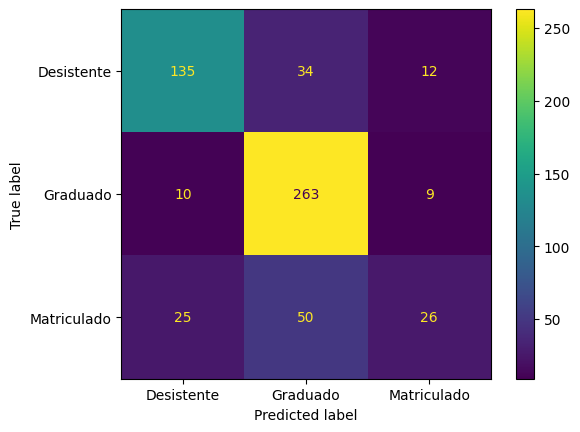

In [ ]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=modelo_rf.classes_)
visualizacao.plot();

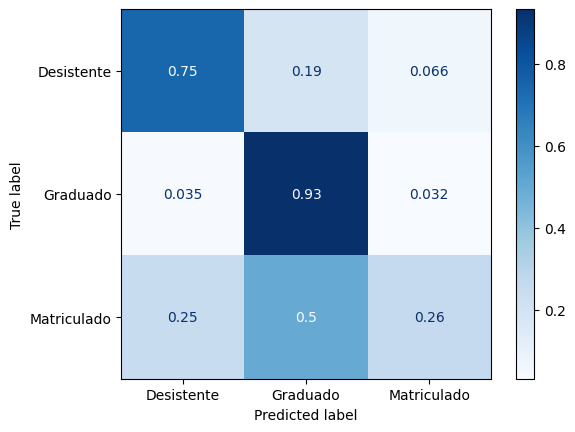

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');

Acertos e erros do nosso modelo.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_val, y_pred)

In [ ]:
print('Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.84      0.71      0.77       181
    Graduado       0.80      0.85      0.83       282
 Matriculado       0.48      0.52      0.50       101

    accuracy                           0.75       564
   macro avg       0.71      0.70      0.70       564
weighted avg       0.76      0.75      0.75       564



O relatório de classificação mostra o desempenho de um modelo de Machine Learning em três classes: Desistente, Graduado e Matriculado. O modelo apresentou uma precisão de 0,78, recall de 0,77 e f1-score de 0,77 para a classe Desistente, com 154 exemplos; para a classe Graduado, o desempenho foi superior, com precisão de 0,80, recall de 0,96 e f1-score de 0,88 em 240 exemplos; já para a classe Matriculado, o desempenho foi o mais baixo, com precisão de 0,59, recall de 0,28 e f1-score de 0,38 em 86 exemplos. No geral, o modelo alcançou uma acurácia de 0,78, com uma média macro no f1-score de 0,68 e uma média ponderada de 0,75, refletindo uma variação de desempenho entre as classes.


Provavelmente estamos sofrendo de um desbalanço aqui nos nossos dados.

## Balanceamento dos dados:

Aqui vamos usar a superamostragem para aumentar a proporção dos nossos valores meno presentes.

In [ ]:
y_treino.value_counts()

,count
Target,
Graduado,1595
Desistente,1027
Matriculado,574


In [ ]:
# Vamos usar o SMOTE para criar amostras sintéticas
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state = 0)

In [ ]:
x_balanceado, y_balanceado = oversample.fit_resample(x_treino, y_treino)

In [ ]:
y_balanceado.value_counts()

,count
Target,
Matriculado,1595
Graduado,1595
Desistente,1595


In [ ]:
modelo = RandomForestClassifier(random_state = 0, max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_pred = modelo.predict(x_val)

Testando o novo modelo:

              precision    recall  f1-score   support

  Desistente       0.84      0.71      0.77       181
    Graduado       0.80      0.85      0.83       282
 Matriculado       0.48      0.52      0.50       101

    accuracy                           0.75       564
   macro avg       0.71      0.70      0.70       564
weighted avg       0.76      0.75      0.75       564



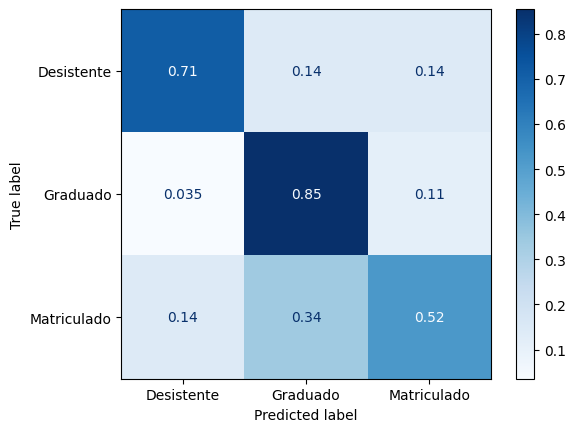

In [ ]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = 'true', cmap = 'Blues');

# Validando o modelo

## Pipeline de validação:

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
modelo = RandomForestClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('floresta', modelo)])

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
cv_resultados = cross_validate(pipeline, x, y, cv = skf, scoring = 'recall_weighted')
cv_resultados['test_score']

array([0.76861702, 0.75132979, 0.74601064, 0.77792553, 0.76728723])

In [ ]:
media = cv_resultados['test_score'].mean()

desvio_padrao = cv_resultados['test_score'].std()

print(f'Intervalo de confiança: [{media - 2 * desvio_padrao} - {min(media + 2* desvio_padrao, 1.0)})]')

Intervalo de confiança: [0.7386611491423826 - 0.7858069359640004)]


# Testando o modelo:

In [ ]:
oversample = SMOTE(random_state = 0)
x_balanceado, y_balanceado = oversample.fit_resample(x,y)
modelo = RandomForestClassifier(random_state = 0, max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred = modelo.predict(x_teste)

              precision    recall  f1-score   support

  Desistente       0.88      0.75      0.81       213
    Graduado       0.82      0.85      0.84       332
 Matriculado       0.50      0.59      0.54       119

    accuracy                           0.77       664
   macro avg       0.73      0.73      0.73       664
weighted avg       0.78      0.77      0.77       664



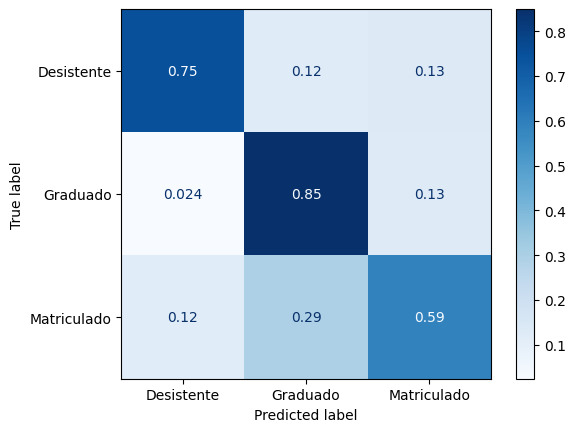

In [ ]:
print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize = 'true', cmap = 'Blues');